In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tanglish-and-tamil-transliterated-words-dataset/third_enhanced_transliterated_words.txt
/kaggle/input/tanglish-and-tamil-transliterated-words-dataset/README.md
/kaggle/input/tanglish-and-tamil-transliterated-words-dataset/third_enhanced_transliterated_words.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/tanglish-and-tamil-transliterated-words-dataset/third_enhanced_transliterated_words.csv')
df.head()

,word,count
0,bro,70702
1,com,20452
2,youtube,20376
3,href,20236
4,amp,15814


In [5]:
df.columns

Index(['word', 'count'], dtype='object')

In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242337 entries, 0 to 242336
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    242337 non-null  object
 1   count   242337 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
# Check for missing values
df.isnull().sum()

word     0
count    0
dtype: int64

In [8]:
# Top 10 most frequent words
df.sort_values(by='count', ascending=False).head(10)

,word,count
0,bro,70702
1,com,20452
2,youtube,20376
3,href,20236
4,amp,15814
5,akka,15280
6,tamil,11708
7,oru,10530
8,mam,9359
9,ku,9113


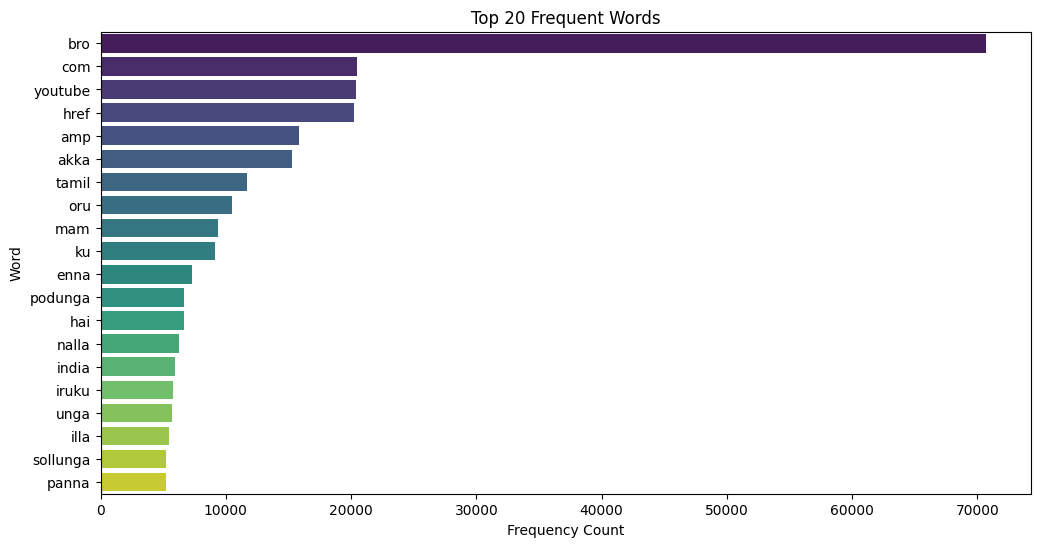

In [9]:
# Top 20 words by frequency
top_words = df.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=top_words, palette='viridis')
plt.title('Top 20 Frequent Words')
plt.xlabel('Frequency Count')
plt.ylabel('Word')
plt.show()

In [10]:
# Label manually based on character set
def detect_script(word):
    return 'Tamil' if any('\u0B80' <= ch <= '\u0BFF' for ch in word) else 'Tanglish'

df['label'] = df['word'].apply(detect_script)
df['label'].value_counts()

label
Tanglish    242337
Name: count, dtype: int64

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample data
data = pd.DataFrame({
    'name': ['abdhul', 'raju', 'mukesh', 'sofia'],
    'count': [10, 20, 15, 5],
    'label': [1, 0, 1, 0]
})

In [12]:
X = data[['name', 'count']]
y = data['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_ohe', OneHotEncoder(handle_unknown='ignore'), ['name'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name'])])),
                ('classifier', LogisticRegression())])

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

